In [2]:
#CAR PRICE PREDICTION WITH MACHINE LEARNING

# Import the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#Load the Data:

classify=pd.read_csv("Car_details.csv")
print(classify.info(),"\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [7]:
# Let's check the first 5 entries of the dataset
print(classify.head(),"\n")

# Let's check how many rows and columns are there
print("(rows,columns) = ",classify.shape,"\n")

   car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \

In [9]:
#Preprocessing and Data Cleaning

# Lets check whether the dataset have any null values
print(classify.isnull().sum(),"\n")


car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64 



In [11]:
# lets check whether the data have any duplicate data, if there any we delete them
print("Number of duplicates : ",classify.duplicated().sum(),"\n")

Number of duplicates :  0 



In [13]:
# We will drop the car_ID as it has no significance for our model
classify.drop('car_ID',axis=1,inplace=True)


KeyError: "['car_ID'] not found in axis"

In [15]:
classify.dropna(inplace=True) # also drop the missing values

In [17]:
# Create the car_company variable
classify['car_company'] = classify['CarName'].apply(lambda x: x.split(" ")[0])

In [20]:
#Visualizing the data

# As we can see there are no null values and duplicates in the data.
# Now, lets check about the statistical information about the data
print(classify.describe(),"\n")

print("The price column is the target column and remaining all columns are independent variables.\n")



        symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000   
mean     0.834146   98.756585  174.049268   65.907805   53.724878   
std      1.245307    6.021776   12.337289    2.145204    2.443522   
min     -2.000000   86.600000  141.100000   60.300000   47.800000   
25%      0.000000   94.500000  166.300000   64.100000   52.000000   
50%      1.000000   97.000000  173.200000   65.500000   54.100000   
75%      2.000000  102.400000  183.100000   66.900000   55.500000   
max      3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693    0.270844    0.313597          3.972040   
min    1488.000000   61.000000    2.540000    2.070000          7.000000  

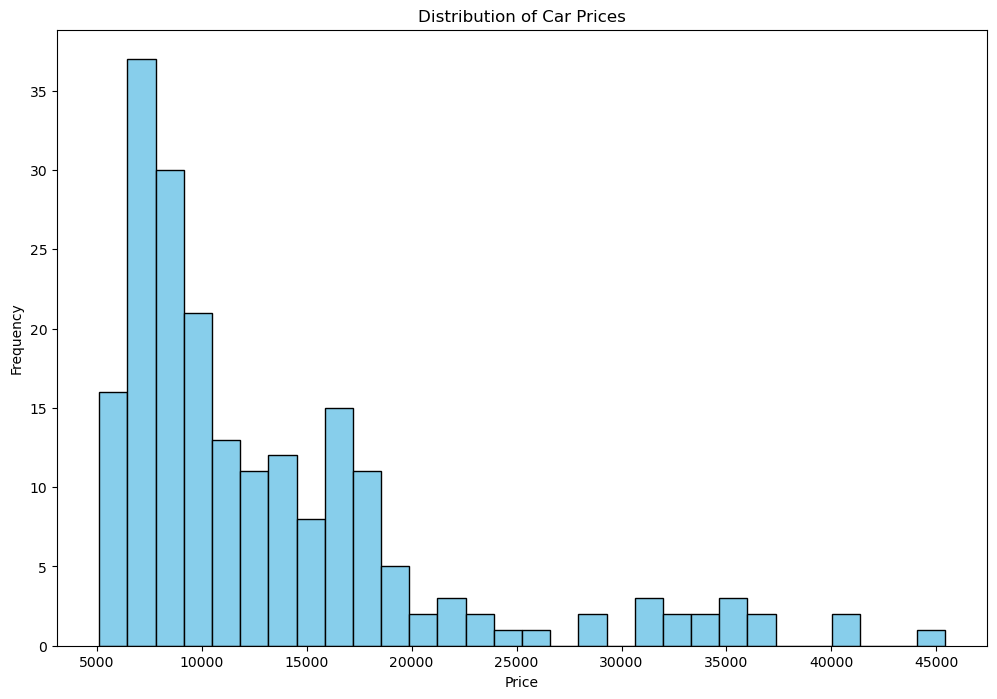

In [22]:
# lets check how the price cloumn is distributed through the dataset
plt.figure(figsize=(12, 8))
plt.hist(classify['price'], bins=30, edgecolor='black', color='skyblue')
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


In [25]:
# Now, lets look at the heatmap of correlation of the data with numerical variables.
plt.figure(figsize=(18,12))
corr=classify.corr()
sns.heatmap(corr,cmap="coolwarm",annot=True)
plt.show()
print("If we check the heatmap, we can say that the price of car is highly correlated with wheelbase, carlength, carwidth, curbweight, enginesize, horsepower, these attributes are also highly dependent on each other. which are offcourse will increase the price of the car and the price is negatively correlated to cithmpg and highwaympg means that car with high mileage will be affordable to middle class, that's why the price is low for them.")

ValueError: could not convert string to float: 'alfa-romero giulia'

<Figure size 1800x1200 with 0 Axes>

In [27]:
#Feature selection and Engineering

X = classify.loc[:, ['symboling', 'fueltype', 'aspiration', 'doornumber','carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength','carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber','enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio','horsepower', 'peakrpm', 'citympg', 'highwaympg',
'car_company']]
y = classify['price']

In [29]:
# lets do label encoding for categorical variables
categorical = X.select_dtypes(include=['object'])
dummies = pd.get_dummies(categorical, drop_first=True)
X = X.drop(list(categorical.columns), axis=1)
X = pd.concat([X,dummies], axis=1)

ValueError: No objects to concatenate

In [35]:
# scaling the features
from sklearn.preprocessing import scale
dat = X.columns
X = pd.DataFrame(scale(X))
X.columns = dat
print(X.columns,"\n")


Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'fueltype_gas',
       'aspiration_turbo', 'doornumber_two', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginelocation_rear', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi', 'car_company_alfa-romero',
       'car_company_audi', 'car_company_bmw', 'car_company_buick',
       'car_company_chevrolet', 'car_company_dodge', 'car_company_ho